# Explore here

   duration_ms                             name  popularity
0     3.605333       The Less I Know The Better          85
1     3.963333                       Borderline          81
2     7.793100                    Let It Happen          78
3     6.054000    New Person, Same Old Mistakes          77
4     3.216000  Feels Like We Only Go Backwards          75
5     5.309850                       Eventually          74
6     7.209333                    One More Hour          72
7     3.520433                         Elephant          71
8     4.441550                       Neverender          70
9     1.792217                            Nangs          70
   duration_ms        name  popularity
8     4.441550  Neverender          70
9     1.792217       Nangs          70
7     3.520433    Elephant          71


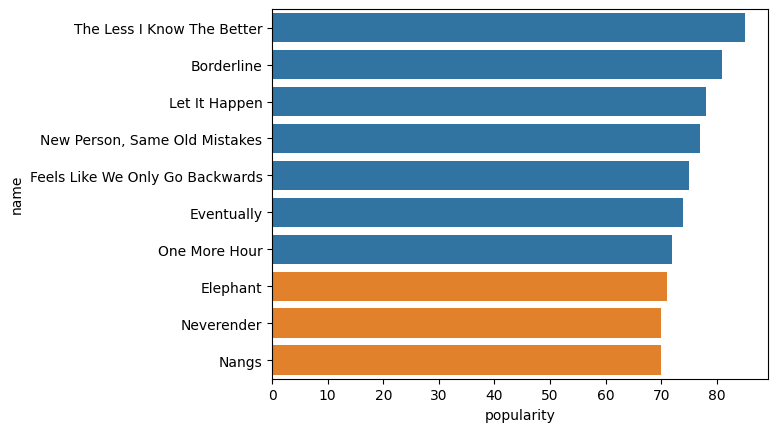

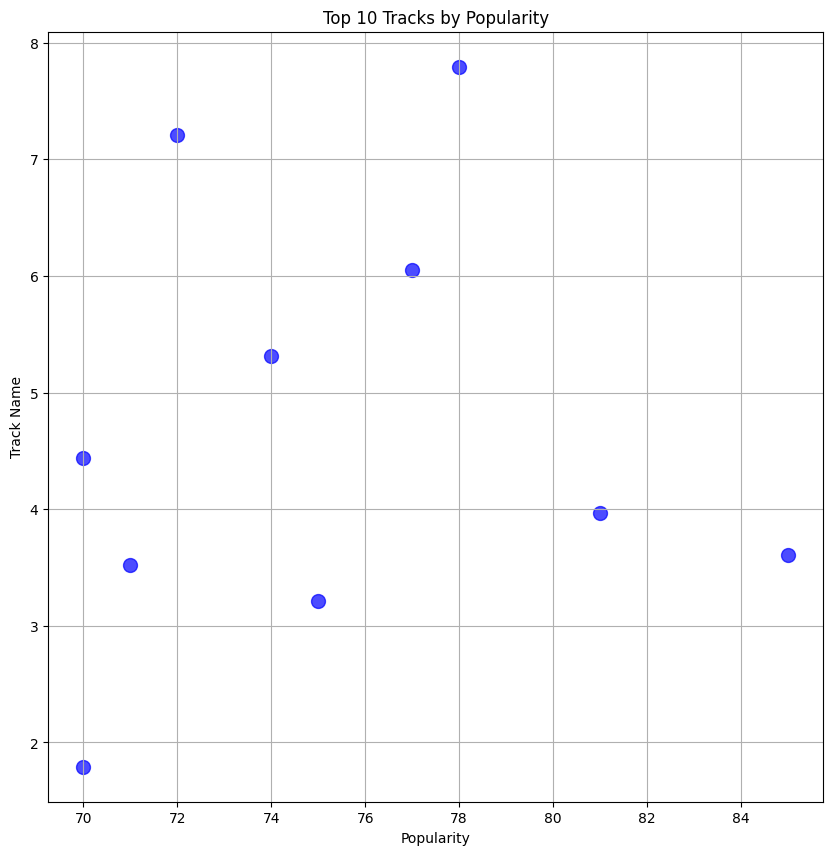

In [2]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# Load the .env file variables
load_dotenv()

# Credentials 
client_id = os.environ.get('client_id')
client_secret = os.environ.get('client_secret')

# Spotipy client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# ID Tame Impala
artist_id = "5INjqkS1o8h1imAzPqGZBb"

# Top 10 Chart
response = sp.artist_top_tracks(artist_id, country='US')
if response:
    tracks = response['tracks']
    
    tracks_data = [{k: (v / (1000 * 60)) % 60 if k == 'duration_ms' else v for k, v in track.items() if k in ['name', 'popularity', 'duration_ms']} for track in tracks]
    
    df_tracks = pd.DataFrame(tracks_data)
        
    print(df_tracks)
    
    # Visuals
    sns.barplot(x='popularity', y='name', data=df_tracks)

# Top 3
    df_tracks_sorted = df_tracks.sort_values(by='popularity', ascending=True).head(3)
    print(df_tracks_sorted)
    sns.barplot(x='popularity', y='name', data=df_tracks_sorted)

# Scatter
plt.figure(figsize=(10, 10))
plt.scatter(df_tracks['popularity'], df_tracks['duration_ms'], color='blue', s=100, alpha=0.7)
plt.title('Top 10 Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.grid(True)
plt.show()
